<a href="https://colab.research.google.com/github/JardielmaQueiroz/Inteigencia_de_negocio/blob/master/implementacaoKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [16]:
#Bibliotecas de exploração de dados
import pandas as pd
import numpy as np

#Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para padronizar a escala 
from sklearn.preprocessing import StandardScaler

# Biblioteca para dividir os dados 
from sklearn.model_selection import train_test_split

#Biblioteca para implementar o KNN
from sklearn.neighbors import KNeighborsClassifier

#Biblioteca para avalir relatório de classificação e matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

#Biblioteca para plotar grafico
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')



# Ler o conjunto de dados da amostra

In [17]:
#Carregar dados da amostra
dados = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/jacksonwillian/inputdata-trab2/master/heart.csv", delimiter="," )
dados.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Normalizar a escala de dados para preparar o algoritmo **KNN**

In [18]:
# Criar instância do scaler
scaler = StandardScaler()

# Ajustar o objeto a todos os dados, exceto a Classe de destino
scaler.fit(dados.drop('target', axis=1))

# Use o objeto scaler para conduzir uma transformação 
scaled_features = scaler.transform(dados.drop('target',axis=1))

dados_normalizados = pd.DataFrame(scaled_features, columns=dados.columns[:-1])
dados_normalizados.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


# Divida os dados normalizados em conjuntos de treinamento e teste

In [19]:
# Definir valor de X,Y
X = dados_normalizados
y = dados['target']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.6, random_state=101)

print(X_treino.shape)
print(X_teste.shape)

print(y_treino.shape)
print(y_teste.shape)

(121, 13)
(182, 13)
(121,)
(182,)


# Criar e treinar o modelo

In [20]:
# Criar instância KNN 
error = []
#knn = KNeighborsClassifier(n_neighbors=5)

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)

    #Treina amostra de 60% dos dados
    knn.fit(X_treino, y_treino)

    # Fazer previsões a partir do subconjunto X_teste
    prev = knn.predict(X_teste)
    prev

    error.append(np.mean(prev != y_teste))

# Grafico para k de 1 a 40

Text(0, 0.5, 'Mean Error')

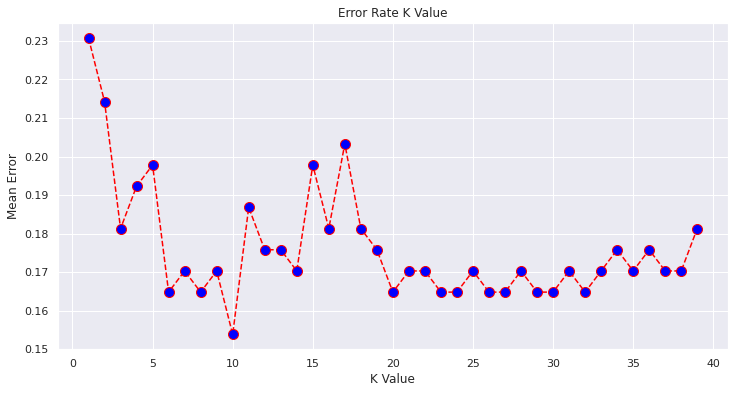

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Avaliar Previsões

In [22]:
# Imprimir relatório de classificação e impressão de matriz de confusão 
print(classification_report(y_teste, prev))
mat = confusion_matrix(y_teste, prev)
print(confusion_matrix(y_teste, prev))

print('\n')
print('Taxa de precisão: {}'.format(np.divide(np.sum([mat[0,0],mat[1,1]]),np.sum(mat)) * 100)+' %')
print('Taxa de error: {}'.format(np.divide(np.sum([mat[0,1],mat[1,0]]),np.sum(mat))* 100)+' %')


              precision    recall  f1-score   support

           0       0.93      0.66      0.77        85
           1       0.76      0.96      0.85        97

    accuracy                           0.82       182
   macro avg       0.85      0.81      0.81       182
weighted avg       0.84      0.82      0.81       182

[[56 29]
 [ 4 93]]


Taxa de precisão: 81.86813186813187 %
Taxa de error: 18.13186813186813 %
